In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
filename="sifted22-10-18-16-52.txt"  # change the name of the file here

In [3]:
xColumn = 1                   # Specify the column containing the x data points 
yColumn = 2                   # Specify the column containing the y data points 
include_x_errors = True      # Enter True or False only (True if x errors needed on plot)
include_y_errors = True       # Enter True or False only (True if y errors needed on plot)
xErrColumn = 0                # Specify the column containing the x errors 
yErrColumn = 3                # Specify the column containing the y errors 
header = False                 # Does your data file contain one of more header lines (e.g. column titles)
head_lines = 0                # Enter the number of header lines in your data file
save_graph = True             # Enter True or False only (True if you wish to save the figure)
CSV = False                     # Is the data separated by commas (True if yes - e.g. a .csv file)

In [4]:
fig_file="figure.png"

In [5]:
def fit_function(t,A0,tau, B, C):  
# In the brackets should be the x parameter (the dependent variable) followed by
# the parameters of the equation to be extracted from the fit
        
    global args                                 # Don't touch this - this enables us to remember the variable names
    args = fit_function.__code__.co_varnames    # Don't touch this - this enables us to remember the variable names
    
    return A0*np.exp(-t/(tau)) + B + C*t      
# Be sure to use np.xxx() for any functions
# such as trig functions (e.g. np.cos() ) or np.exp( ), etc.

In [6]:
guess = (1000,2,0,0) # Enter the initial guess for the parameters of the fit function

In [7]:
fit_function(1,*guess)            
# Calls the function to be fitted, with x=1 and the initial guesses. This
# is just to extract the names of the arguments
    

if len(args)-1 != len(guess):     # Checks the number of paramaters and the number of guesses
    print("ERROR - mismatch between number of parameters and number of guesses")
else:
    print("This code will fit the specified function and extract")
    print(len(args)-1,"parameters with the following inital guesses:\n")
    for i in range(len(guess)):         # For each parameter....
        print(args[i+1],"=",guess[i])   # ..prints the name of each parameter and its initial guess

This code will fit the specified function and extract
4 parameters with the following inital guesses:

A0 = 1000
tau = 2
B = 0
C = 0


In [8]:
raw_data = open(filename,'r')       # Open the data file again
lines=0

# Read the data: count the number of lines
i=0
for data_line in raw_data: 
    lines+=1
raw_data.seek(0)
# print(lines)

# Create an array to store all the time values
times=np.zeros(lines)

# Read the data: store all the time values in an array
for data_line in raw_data:                       
        row = data_line.strip()                   
        data = row.split()               
        times[i]=float(data[0])/1000
        i=i+1 
        # print(i,times[i-1],float(data[0])/1000)        #!Error will appear about index out of range if blank lines are at the end of the data file       
print(i,"rows of data successfully stored in array")
raw_data.close()

# converts to a histogram with X (first number) bins in the range (Y,Z) microseconds 
y,edges=np.histogram(times,20,range=(0,20))

if min(y)==0: print("TOO MANY BINS, one of the bins has zero counts!!")

# converts the bin "edges" in x values that correspond to the centre of the bin
x=edges[:-1].copy()
binWidth=(x[1]-x[0])
x+=binWidth/2

# y and x are now arrays of the histogram values (y) and times in us (x). This can now be plotted. 

# The errors in y and x are the square root of the number of counts and half the bin width. 

xError=np.zeros(len(x))
xError.fill(binWidth/2)
yError=np.sqrt(y)

# The arrays x and y and their errors can now be plotted using matplotlib and fitted with a curve. 
# See the Jupyter_Plot_Curve_Fit.ipynb script, for examples on how to fit curves and plot data

4813 rows of data successfully stored in array


In [9]:
# Performs a fit calling the numpy polyfit function (polynomial order 1):

# If y errors are included, they will be used as weights in the fit calculation:

if include_y_errors:                                                         # Are y errors are included?
    para,covar = curve_fit(fit_function, x, y,p0=guess,sigma=yError)
else:
    para,covar = curve_fit(fit_function, x, y,p0=guess)            # Performs an "unweighted" fit

# Extract the parameters from the fit:

errors=np.sqrt(np.diag(covar))                     # Creates a list called "errors" from the covariance matrix

x_fit=np.linspace(min(x),max(x),1000)    # Creates an x array to be used for drawing the fitted curve
y_fit=fit_function(x_fit,*para)                    # Creates a y array containing the fitted curve

print(para)


[ 2.37612440e+03  1.94170560e+00  1.62079958e+01 -5.32183519e-01]


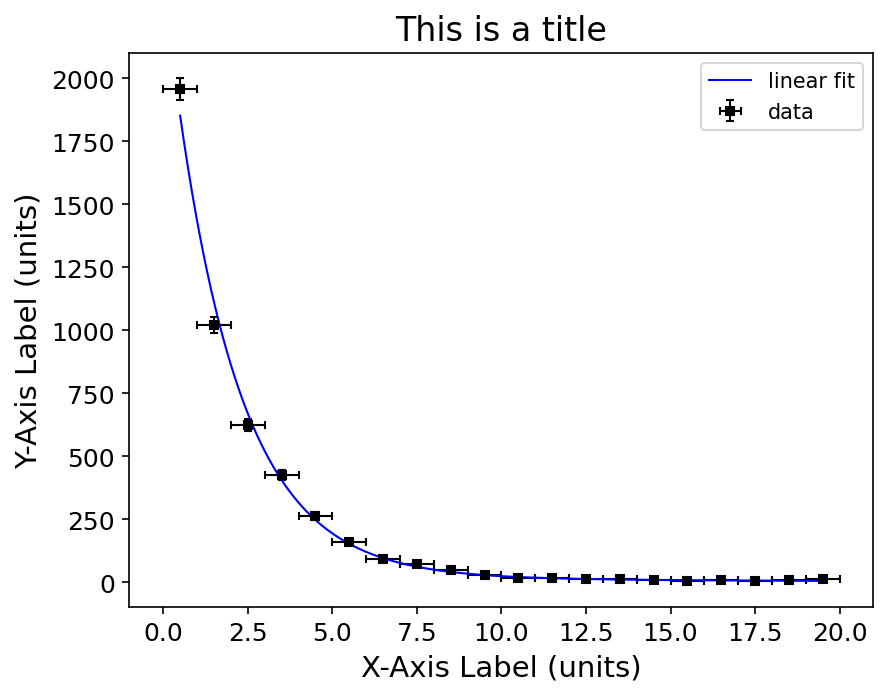


Fit Results:

A0 = 2376.124403991017 +/- 79.33074655276401
tau = 1.9417056000657424 +/- 0.06691608708483997
B = 16.20799583735706 +/- 9.392668691424527
C = -0.5321835190058481 +/- 0.580090302048334


In [10]:
plt.rcParams['figure.dpi'] = 150   # Controls the size and resolution of the figures as displayed in Jupyter

plt.errorbar(x,y,yerr=yError,xerr=xError,fmt='s',color='black',markersize=4,elinewidth=1,capsize=2,label='data')
plt.plot(x_fit,y_fit,'-',color='blue',linewidth=1, label="linear fit")
    
#plt.xlim(0,2.5)
#plt.ylim(0,25)
plt.xlabel('X-Axis Label (units)',fontsize=14)
plt.ylabel('Y-Axis Label (units)',fontsize=14)
plt.title("This is a title",fontsize=16,loc="center")
#plt.minorticks_on()
#plt.text(7.5,95,"Here is some text on the graph",color='red',fontsize=10,weight="normal",fontstyle="italic")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
#plt.grid(True)

if save_graph:
    plt.savefig(fig_file,dpi=500)

plt.show()

print("\nFit Results:\n")
for i in range(len(para)):
        print(args[i+1],"=",para[i],"+/-",errors[i])
        